In [12]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid", {'legend.frameon':True})

columns = [
    'id', 'testing_for', 'address', 'zip_code', 'provider',
    'connected_with', 'monthly_price', 'provider_down_speed',
    'provider_price', 'actual_down_speed', 'actual_price', 'rating',
    'completed', 'created_at', 'updated_at', 'latitude', 'longitude',
    'ping', 'actual_upload_speed', 'test_id', 'ip_address', 'hostname',
    'from_mlab', 'area_code', 'test_type', 'census_code',
    'upload_median', 'download_median', 'census_status', 'test_date',
    'country_code', 'region', 'county', 'accuracy', 'location',
    'census_block'
]

filename = './data/3cb026d0-0ad8-45c3-a030-cd5b19c2ab17.csv'
sua = pd.read_csv(filename, header=None, names=columns)

sua.tail()

,id,testing_for,address,zip_code,provider,connected_with,monthly_price,provider_down_speed,provider_price,actual_down_speed,...,upload_median,download_median,census_status,test_date,country_code,region,county,accuracy,location,census_block
1470,8684792,Home Wifi,NaN,97493.0,LS Networks,NaN,40.0,14.0,2.86,4.14,...,NaN,NaN,NaN,2019-11-28,US,OR,41039.0,50.0,NaN,4.103900e+14
1471,8684793,Home Wifi,NaN,97401.0,"Comcast Cable Communications, LLC","Wireless connection, multiple devices in house...",NaN,NaN,NaN,93.40,...,NaN,NaN,NaN,2019-11-29,US,OR,41039.0,5018.0,NaN,4.103900e+14
1472,8684794,Home Wifi,NaN,97426.0,"CenturyLink Communications, LLC",NaN,27.0,0.0,NaN,0.24,...,NaN,NaN,NaN,2019-11-29,US,OR,41039.0,50.0,NaN,4.103900e+14
1473,8684795,Home Wifi,NaN,97471.0,Douglas FastNet,NaN,50.0,100.0,0.50,91.62,...,NaN,NaN,NaN,2019-11-29,US,OR,41019.0,50.0,NaN,4.101907e+14
1474,8684796,Home Wifi,NaN,97471.0,Douglas FastNet,NaN,50.0,50.0,1.00,286.21,...,NaN,NaN,NaN,2019-11-29,US,OR,41019.0,50.0,NaN,4.101915e+14


<Figure size 1440x720 with 0 Axes>

In [13]:
sua['rating'] = sua['rating'].replace(0.0,  np.nan)
sua = sua[sua['test_type'] != 'duplicate']

In [14]:
sua.shape

(1257, 36)

In [15]:
sua.describe()

,zip_code,monthly_price,provider_down_speed,provider_price,actual_down_speed,actual_price,rating,completed,latitude,longitude,...,actual_upload_speed,from_mlab,area_code,census_code,upload_median,download_median,county,accuracy,location,census_block
count,1095.000000,662.000000,561.000000,528.000000,1203.000000,528.000000,704.00000,1203.000000,1100.000000,1100.000000,...,1203.000000,1203.0,0.0,1.058000e+03,0.0,0.0,1097.000000,4.670000e+02,0.0,9.770000e+02
mean,94810.753425,74.901813,132.600713,5.392860,52.905810,30.220455,4.09375,0.989194,43.690457,-120.815072,...,22.076168,0.0,NaN,4.060024e+10,NaN,NaN,39972.266180,1.384294e+04,NaN,4.107053e+14
std,11446.974809,40.223442,464.317603,11.967097,80.380748,146.976173,1.90149,0.103433,2.671426,12.581247,...,71.625023,0.0,NaN,4.234166e+09,NaN,NaN,5910.213005,1.165557e+05,NaN,2.045784e+13
min,6473.000000,0.000000,0.000000,0.010000,0.050000,0.040000,1.00000,0.000000,-2.996100,-157.992500,...,0.000000,0.0,NaN,6.037462e+09,NaN,NaN,4019.000000,6.000000e+00,NaN,1.601195e+14
25%,97401.000000,50.000000,12.000000,0.577500,7.270000,1.157500,3.00000,1.000000,44.015975,-123.157200,...,1.420000,0.0,NaN,4.103900e+10,NaN,NaN,41039.000000,5.000000e+01,NaN,4.103900e+14
50%,97405.000000,65.000000,50.000000,1.330000,23.850000,3.145000,4.00000,1.000000,44.050500,-123.092350,...,5.720000,0.0,NaN,4.103900e+10,NaN,NaN,41039.000000,5.000000e+01,NaN,4.103900e+14
75%,97448.000000,90.000000,100.000000,4.500000,68.180000,11.285000,6.00000,1.000000,44.089100,-123.012200,...,11.540000,0.0,NaN,4.103900e+10,NaN,NaN,41039.000000,1.062000e+03,NaN,4.103900e+14
max,99352.000000,200.000000,10000.000000,120.000000,828.200000,2400.000000,7.00000,1.000000,47.625200,104.752000,...,864.820000,0.0,NaN,5.502500e+10,NaN,NaN,55035.000000,1.488703e+06,NaN,5.306701e+14


In [16]:
sua.groupby('provider').agg({
    "id": ["count"],
    "rating":  ["mean", "median", "count"],
    "actual_down_speed": ["mean", "median", "count"],
    "monthly_price": ["mean", "median", "count"],
    "actual_price": ["mean", "median", "count"]
}).sort_values(('id', 'count'), ascending=False).head(15)

id    rating         \
                                                   count      mean median   
provider                                                                    
Comcast Cable Communications, LLC                    444  4.389105    4.0   
CenturyLink Communications, LLC                      239  2.945578    3.0   
Charter Communications                                94  4.264151    4.0   
XS Media                                              79  5.524590    6.0   
Verizon Wireless                                      49  3.000000    3.0   
ViaSat,Inc.                                           33  1.888889    1.0   
Frontier Communications of America, Inc.              22  2.846154    3.0   
Douglas FastNet                                       22  7.000000    7.0   
Hughes Network Systems                                19  2.250000    2.5   
AT&T Mobility LLC                                     19  4.000000    4.0   
Network for Education and Research in Oregon (N...    17  5.833333    6.0   
Emerald Broadband, LLC                                14  4.083333    4.5   
LS Networks                                            9  5.400000    6.0   
ATT                                                    8  4.600000    5.0   
EASTERN OREGON TELECOM                                 8  4.250000    4.0   

                                                         actual_down_speed  \
                                                   count              mean   
provider                                                                     
Comcast Cable Communications, LLC                    257         78.386216   
CenturyLink Communications, LLC                      147         10.917824   
Charter Communications                                53         45.811596   
XS Media                                              61         89.360127   
Verizon Wireless                                      20         15.587551   
ViaSat,Inc.                                           27          7.534848   
Frontier Communications of America, Inc.              13         11.777727   
Douglas FastNet                                       20        122.073182   
Hughes Network Systems                                12          4.807368   
AT&T Mobility LLC                                      7         16.462632   
Network for Education and Research in Oregon (N...     6         55.697647   
Emerald Broadband, LLC                                12         25.819286   
LS Networks                                            5         38.605556   
ATT                                                    5         79.333750   
EASTERN OREGON TELECOM                                 4         10.001250   

                                                                  \
                                                    median count   
provider                                                           
Comcast Cable Communications, LLC                   59.445   444   
CenturyLink Communications, LLC                      6.000   239   
Charter Communications                              32.165    94   
XS Media                                            41.910    79   
Verizon Wireless                                     7.730    49   
ViaSat,Inc.                                          5.860    33   
Frontier Communications of America, Inc.             7.510    22   
Douglas FastNet                                     89.805    22   
Hughes Network Systems                               2.100    19   
AT&T Mobility LLC                                   13.030    19   
Network for Education and Research in Oregon (N...  24.940    17   
Emerald Broadband, LLC                              15.400    14   
LS Networks                                         43.160     9   
ATT                                                 84.285     8   
EASTERN OREGON TELECOM                               8.490     8   

                                     

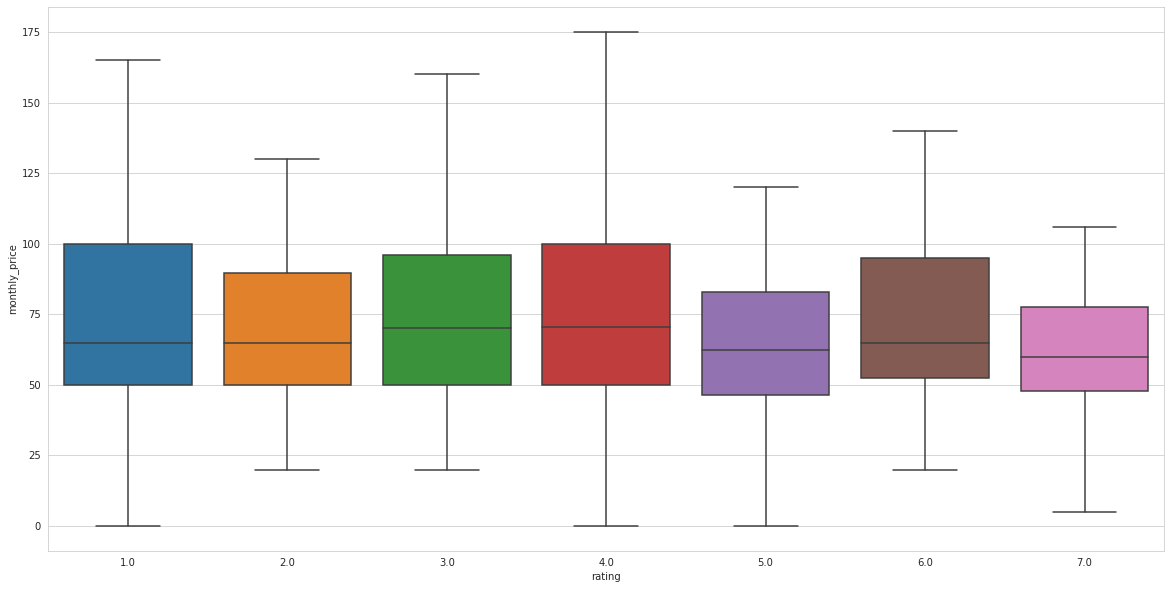

In [20]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='rating', y='monthly_price', data=sua, showfliers=False)

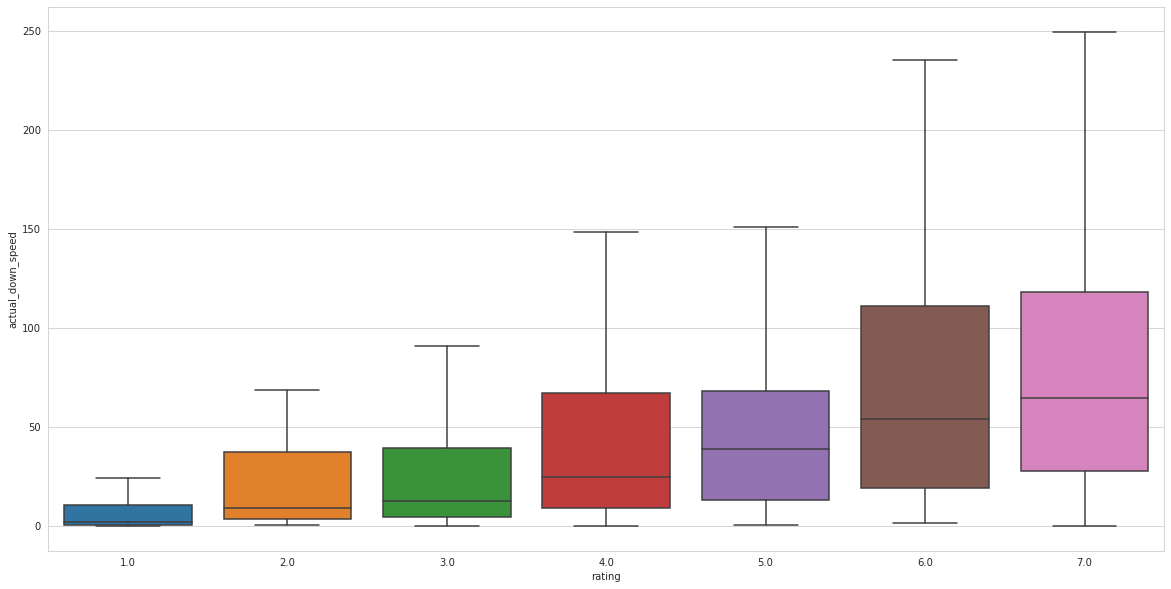

In [22]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='rating', y='actual_down_speed', data=sua,  showfliers=False)

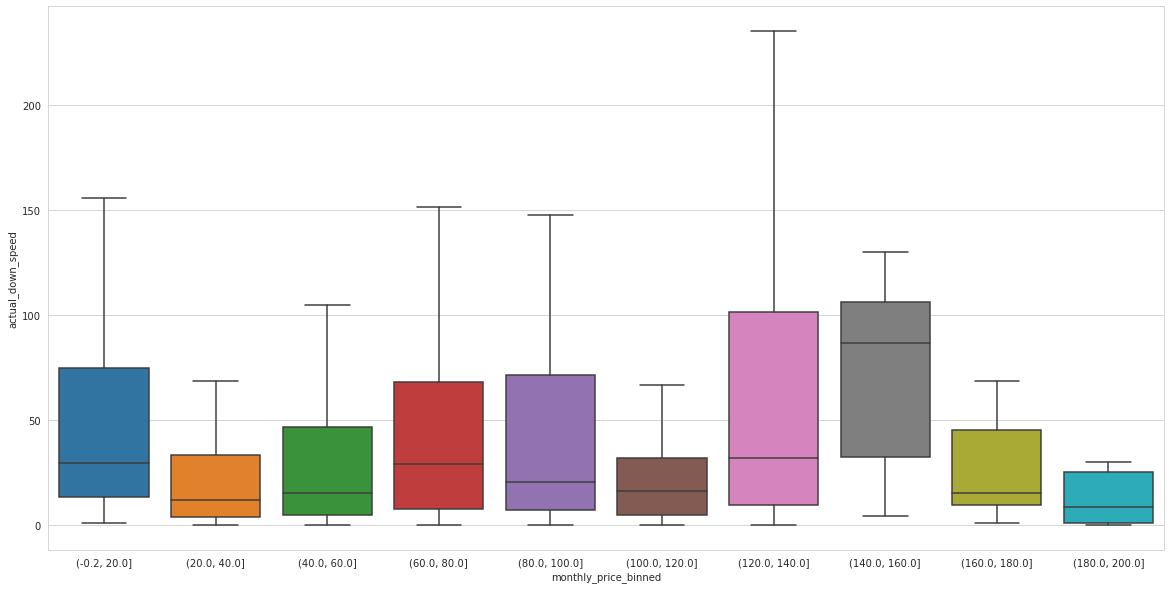

In [30]:
sua['monthly_price_binned'] = pd.cut(sua['monthly_price'], 10)
plt.figure(figsize=(20, 10))
sns.boxplot(x='monthly_price_binned', y='actual_down_speed',
                 data=sua, showfliers=False)

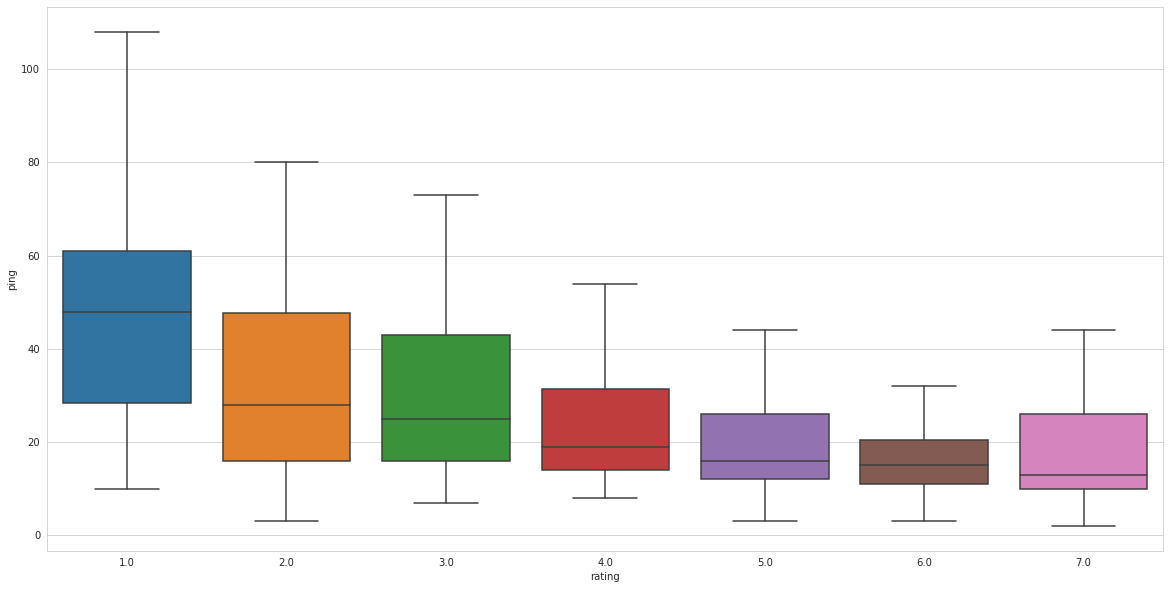

In [31]:
plt.figure(figsize=(20, 10))
ax = sns.boxplot(x='rating', y='ping', data=sua, showfliers=False)

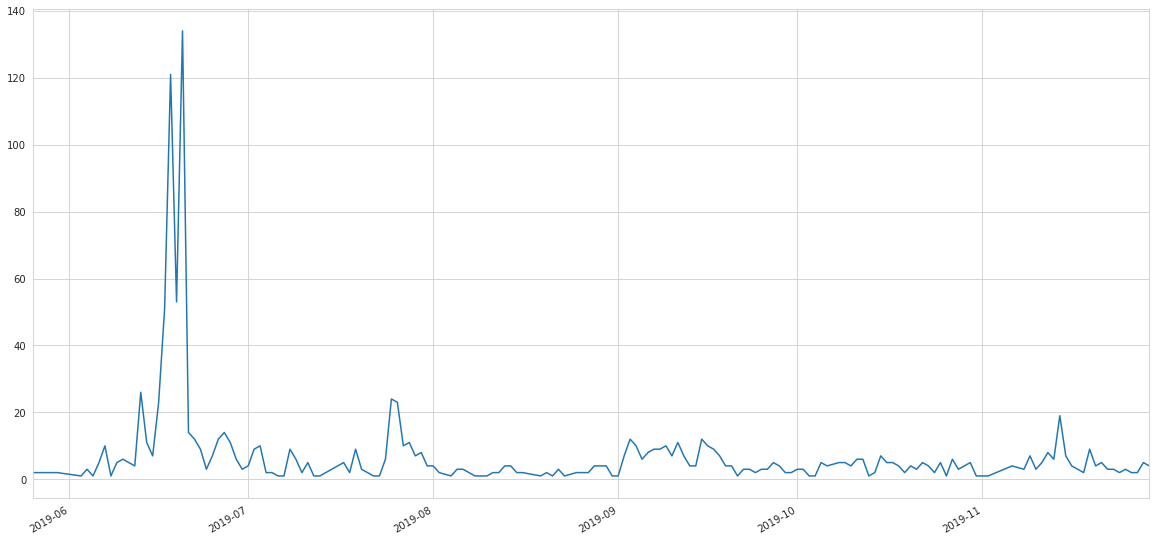

In [10]:
sua['test_datetime'] = pd.to_datetime(sua['test_date'])
by_date = sua['test_datetime'].value_counts()
by_date.plot(figsize=(20,10))